In [1]:
from qiskit import __version__
print(__version__)

1.3.2


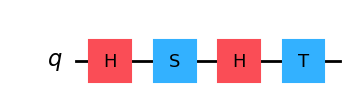

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
#from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

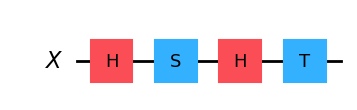

In [3]:
X = QuantumRegister(1, "X")

qc = QuantumCircuit(X)
qc.h(X)
qc.s(X)
qc.h(X)
qc.t(X)

display(qc.draw(output="mpl"))

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
     ┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──
          


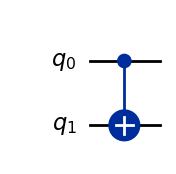

<IPython.core.display.Latex object>

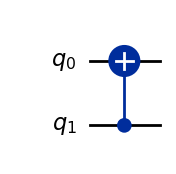

<IPython.core.display.Latex object>

In [4]:
# Controlled-NOT gate

## Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)


# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Draw the circuit
print(qc)

## Create a quantum circuit with 2 qubits
qc1 = QuantumCircuit(2)

# Apply a CNOT gate with qubit 1 as control and qubit 0 as target
qc1.cx(1, 0)
print(qc1)

display(qc.draw("mpl"))
display(Operator.from_circuit(qc).draw("latex"))
display(qc1.draw("mpl"))
display(Operator.from_circuit(qc1).draw("latex"))

In [5]:
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)

print("State after applying CNOT gate:", state)

State after applying CNOT gate: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Initialize the qubits to a superposition state (|ψ⟩ = (|00⟩ + |10⟩)/√2)
#qc.h(0)

# Apply a CNOT gate
qc.cx(0, 1)

# Simulate the final statevector
state = Statevector.from_instruction(qc)

# Print the final statevector
print("Statevector after CNOT:", state)

Statevector after CNOT: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


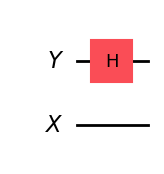

<IPython.core.display.Latex object>

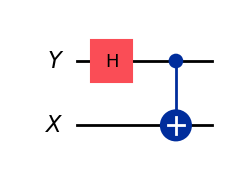

<IPython.core.display.Latex object>

In [7]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
qc = QuantumCircuit(Y,X)
qc.h(Y)
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))
qc.cx(Y, X)

display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

<IPython.core.display.Latex object>

Final Statevector: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


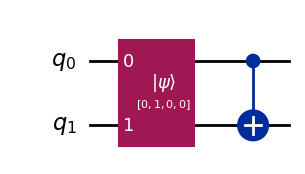

<IPython.core.display.Latex object>

In [8]:
# Initialize a Custom State Using initialize:

qc = QuantumCircuit(2)

# Define the initial state vector for |01⟩
# |01⟩ corresponds to [0, 1, 0, 0] in computational basis
initial_state = Statevector([0, 1, 0, 0])  # corresponds to |01>
display(initial_state.draw("latex"))
#initialize qubits
qc.initialize(initial_state, [0,1])

qc.cx(0,1)

state = Statevector.from_instruction(qc)
# Print the final statevector
print("Final Statevector:", state)
qc.draw("mpl")
display(qc.draw("mpl"))
display(state.draw("latex"))


Final Statevector: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


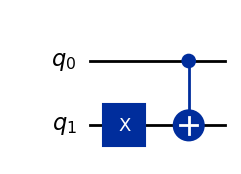

<IPython.core.display.Latex object>

In [9]:
# STatndard Basis states using gates

qc = QuantumCircuit(2)

#qc.x(0)
qc.x(1)

qc.cx(0,1)

state = Statevector.from_instruction(qc)
# Print the final statevector
print("Final Statevector:", state)

display(qc.draw("mpl"))
display(state.draw("latex"))

#print(qc)

In [10]:
#Superposition States Using h

from qiskit import QuantumCircuit

# Create a circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit to create superposition
qc.h(0)

# Apply a CNOT gate to entangle the qubits
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
# Print the final statevector
print("Final Statevector:", state)

# Print the circuit
print(qc)


Final Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [11]:
# Custom State Preparatfrom qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Create the statevector for (|00⟩ + |11⟩)/√2
state = Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
display(state.draw("latex"))
# Create a circuit and initialize it with the statevector
qc = QuantumCircuit(2)
qc.initialize(state, [0, 1])

# Print the circuit
print(qc)


<IPython.core.display.Latex object>

     ┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  Initialize(0.70711,0,0,0.70711) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

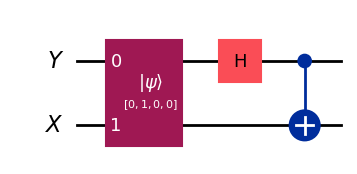

In [12]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
# Create the statevector for (|00⟩ + |11⟩)/√2
state = Statevector([0,1,0,0])
display(state.draw("latex"))
# Create a 2-qubit quantum circuit
qc = QuantumCircuit(Y, X)

# Initializes the input state
qc.initialize(state, [Y[0], X[0]])

# Apply Hadamard gate operation on Y
qc.h(Y)

# Controlled-NOT operation, where Y is the control and X is the target
qc.cx(Y, X)

# Compute the Unitary operation implemented by the entire circuit
#U = Operator.from_circuit(qc)

# Display the unitary matrix
#display(U.draw("latex"))


# Generate a statevector representing the quantum state resulting from applying the given quantum circuit (qc)
final_state = Statevector.from_instruction(qc)

# Display the final statevector
display(final_state.draw("latex"))

# Apply the unitary matrix to the statevector (should give the same result as above)
#display(state.evolve(U).draw("latex"))

# Draw the circuit
qc.draw("mpl")


In [15]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Initialize the qubits to |ψ⟩ = |0⟩|1⟩ (control qubit in |0⟩ and target qubit in |1⟩)
qc.x(1)  # Apply an X gate to the second qubit to set it to |1⟩

# Apply the CNOT gate (control qubit: 0, target qubit: 1)
qc.cx(0, 1)

# Print the circuit
print(qc)

# Use the statevector simulator to see the result
statevector_simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, statevector_simulator)
result = job.result()

# Get the final statevector after applying the CNOT gate
final_state = result.get_statevector()

print("Final Statevector:", final_state)


ImportError: cannot import name 'Aer' from 'qiskit' (/home/swaroop/Documents/CSP/Quantum Computing/codes/tutorial-Qiskit/.venv/lib/python3.12/site-packages/qiskit/__init__.py)

<IPython.core.display.Latex object>

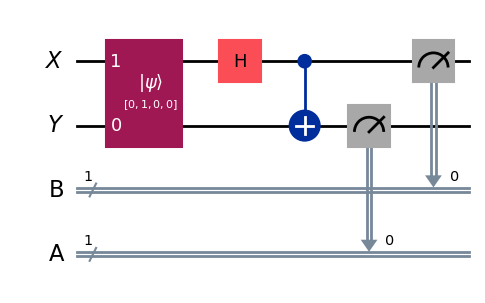

In [22]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Operator, Statevector
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

# Create the statevector for (|01⟩ + |10⟩)/√2
state = Statevector([0, 1, 0, 0])

qc = QuantumCircuit(X, Y, B, A)
qc.initialize(state, [Y[0], X[0]])

#qc.x(Y)
qc.h(X)
qc.cx(X, Y)

state = Statevector.from_instruction(qc)
display(state.draw("latex"))
qc.measure(Y, A)
qc.measure(X, B)

qc.draw("mpl")

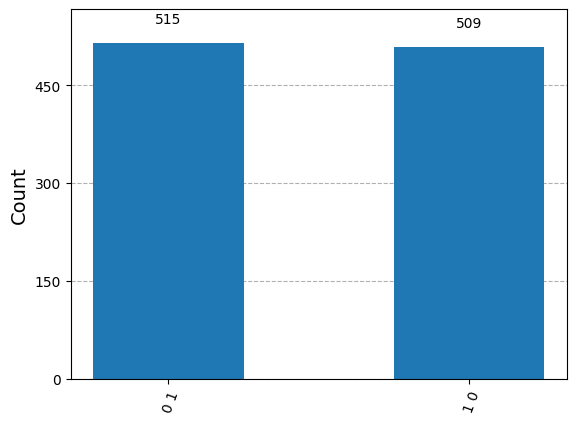

In [23]:
from qiskit_aer import AerSimulator

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))